In [1]:
# import of required packages
from nansat import Nansat, Domain
import os
from glob import glob
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paths to root directories for each sensor:
M_DATA_PATH = '/data/MODISa/LAC_OC'
S2_DATA_PATH = '/data/sentinel2a'
S3_DATA_PATH = '/data/sentinel3'

M_REPROJECTED_DATA_PATH = '/data/reprojected_data/MODISa/'
S2_REPROJECTED_DATA_PATH = '/data/reprojected_data/sentinel2/'

In [3]:
def get_modis_date(mfile):
    f = os.path.split(mfile)[-1]
    f_year, f_day = int(f[1:5]), int(f[5:8])
    f_date = datetime.date(f_year, 1, 1) + datetime.timedelta(f_day - 1)
    return f_date

In [4]:
def get_sentinel_date(sfile, sensor):
    """
    :param sfile: str, filename
    :param sensor: str, sensor type: <sentinel2>, <sentinel3>
    :return: 
    """
    index = 5
    if sensor is 'sentinel3':
        index = 7
        
    f_date = os.path.split(sfile)[-1].split('_')[index].split('T')[0]
    f_date = datetime.date(int(f_date[0:4]), int(f_date[4:6]), int(f_date[6:8]))
    return f_date

In [5]:
def get_data_info(path, sensor):
    """
    :param path: str, path to files storage 
    :param sensor: str, name of sensor: <modis>, <sentinel2>, <sentinel3>
    :return: pandas.core.frame.DataFrame object, consists of two columns: <Date>, <Path to file (<sensor>)> 
    """
    if sensor is 'modis':
        files_list = sorted(glob(os.path.join(path, 'A*.nc')))
        dates = [get_modis_date(f) for f in files_list]
    else:
        files_list = sorted(glob(os.path.join(path, 'S*')))
        dates = [get_sentinel_date(f, sensor) for f in files_list]
    
    filename_list = [os.path.split(fpath)[-1] for fpath in files_list]
    data_info = pd.DataFrame({'Date': dates, 'Filename (%s)' % sensor: filename_list})
    
    return data_info

In [9]:
# Collect information about MODISa data
m_data_info = get_data_info(M_DATA_PATH, 'modis')
# Collect information about Sentinel-2a data
s2_data_info = get_data_info(S2_DATA_PATH, 'sentinel2')
# Collect information about Sentinel-3 OCLI data
s3_data_info = get_data_info(S3_DATA_PATH, 'sentinel3')

In [10]:
s2_data_info

,Date,Filename (sentinel2)
0,2016-03-09,S2A_OPER_PRD_MSIL1C_PDMC_20160309T031011_R126_...
1,2016-05-09,S2A_OPER_PRD_MSIL1C_PDMC_20160509T203209_R126_...
2,2016-07-05,S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_...
3,2016-07-26,S2A_OPER_PRD_MSIL1C_PDMC_20160726T134643_R126_...
4,2016-08-15,S2A_OPER_PRD_MSIL1C_PDMC_20160815T014006_R126_...


In [11]:
result = pd.merge(m_data_info, s2_data_info, 'left', on='Date')
result = result.merge(s3_data_info, 'left', on='Date')
result

,Date,Filename (modis),Filename (sentinel2),Filename (sentinel3)
0,2016-03-09,A2016069180000.L2_LAC_OC.x.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160309T031011_R126_...,NaN
1,2016-03-09,A2016069194000.L2_LAC_OC.x.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160309T031011_R126_...,NaN
2,2016-05-09,A2016130173000.L2_LAC_OC.x.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160509T203209_R126_...,NaN
3,2016-05-09,A2016130191000.L2_LAC_OC.x.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160509T203209_R126_...,NaN
4,2016-07-05,A2016187190000.L2_LAC_OC.x.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_...,NaN
5,2016-07-26,A2016208192000.L2_LAC_OC.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160726T134643_R126_...,NaN
6,2016-08-15,A2016228185500.L2_LAC_OC.x.nc,S2A_OPER_PRD_MSIL1C_PDMC_20160815T014006_R126_...,NaN
7,2016-11-05,A2016310184000.L2_LAC_OC.x.nc,NaN,S3A_OL_1_EFR____20161105T161923_20161105T16222...
8,2016-11-05,A2016310184500.L2_LAC_OC.x.nc,NaN,S3A_OL_1_EFR____20161105T161923_20161105T16222...
9,2016-11-06,A2016311175000.L2_LAC_OC.x.nc,NaN,S3A_OL_1_EFR____20161106T155312_20161106T15561...


In [46]:
m_eq_s2_data = pd.merge(m_data_info, s2_data_info, on='Date')

A2016069180000.L2_LAC_OC.x.nc 2016-03-09


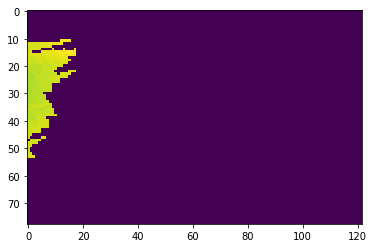

A2016069194000.L2_LAC_OC.x.nc 2016-03-09


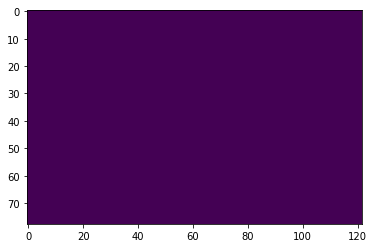

A2016130173000.L2_LAC_OC.x.nc 2016-05-09


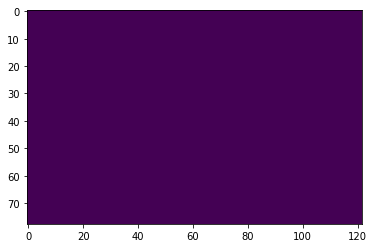

A2016130191000.L2_LAC_OC.x.nc 2016-05-09


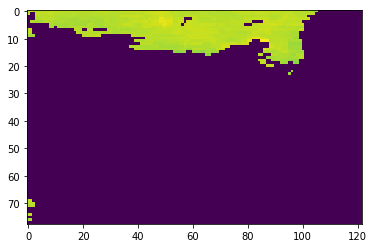

A2016187190000.L2_LAC_OC.x.nc 2016-07-05


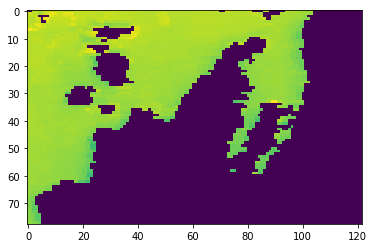

A2016228185500.L2_LAC_OC.x.nc 2016-08-15


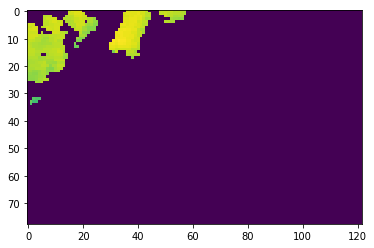

In [68]:
for mfile in m_eq_s2_data.iloc[:,1]:
    print mfile, get_modis_date(mfile)
    n = Nansat(os.path.join(M_REPROJECTED_DATA_PATH, mfile + '_reprojected.nc'))
    plt.imshow(n[3])
    plt.show()

In [80]:
test.iloc[:,2][4]

'S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE'

In [69]:
from nansat import Nansat

In [70]:
Nansat.watermask?

In [94]:
from michigan_fuse.fusion import Fusion

In [96]:
mfile = os.path.join(M_REPROJECTED_DATA_PATH, 'A2016187190000.L2_LAC_OC.x.nc_reprojected.nc')
sfile = os.path.join(S2_REPROJECTED_DATA_PATH, 'S2A_OPER_PRD_MSIL1C_PDMC_20160705T215730_R126_V20160705T164320_20160705T164320.SAFE_reprojected.nc')

In [99]:
reload(michigan_fuse.fusion.Fusion)
Fusion(mfile, sfile)

NameError: name 'michigan_fuse' is not defined

In [86]:
n = Nansat(sfile)

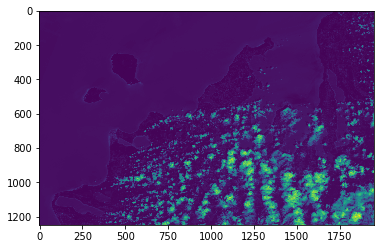

In [87]:
plt.imshow(n[3])
plt.show()